In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skit
import seaborn as sns
from IPython.display import display, Markdown, Latex

RAW_DATA = pd.read_csv('stats.txt').reset_index(drop=True)

if True in RAW_DATA['brutOK'].unique():
    display(Markdown("### Need check data. Something wrong some methods which should have optimum return different values."))

timeB = ['tB','tBB','tDW','tDC','tH','tFPTASeps0.01','tFPTASeps0.05','tFPTASeps0.1','tFPTASeps0.2','tFPTASeps0.3',\
        'tFPTASeps0.4','tFPTASeps0.5','tFPTASeps0.6','tFPTASeps0.7','tFPTASeps0.8','tFPTASeps0.9','tFPTASeps0.95',\
        'tFPTASeps0.99']
errB = ['errH','errFPTASeps0.01','errFPTASeps0.05','errFPTASeps0.1','errFPTASeps0.2','errFPTASeps0.3',\
       'errFPTASeps0.4','errFPTASeps0.5','errFPTASeps0.6','errFPTASeps0.7','errFPTASeps0.8','errFPTASeps0.9',\
       'errFPTASeps0.95','errFPTASeps0.99']

timeMean = RAW_DATA.groupby(['n']).mean()[timeB]
timeVar = RAW_DATA.groupby(['n']).var()[timeB]
errorMean =  RAW_DATA.groupby(['n']).mean()[errB]
errorMax = RAW_DATA.groupby(['n']).max()[errB]


### Need check data. Something wrong some methods which should have optimum return different values.

In [4]:
def do_plot(sizeX, sizeY, index, data, xLabel, yLabel, file, yTicks = 30):
    fig, ax = plt.subplots(figsize=(sizeX,sizeY))
    ax.plot(index, data ,  marker='.',linewidth=0.5,  markersize=60)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticks(index)
    yTick = []
    last = None
    tick = data.values.reshape((data.values.size))
    tick.sort()
    minSize = tick[-1] / yTicks
    for i in tick:
        if last is None:
            yTick.append(i)
            last = i
            continue
        if i - last > minSize:
            yTick.append(i)
            last = i
    ax.set_yticks(yTick)
    ax.legend(data.columns, fontsize = 50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(xLabel, size = 35)
    plt.ylabel(yLabel, size = 35)
    plt.grid()
    fig.savefig(file, bbox_inches='tight')

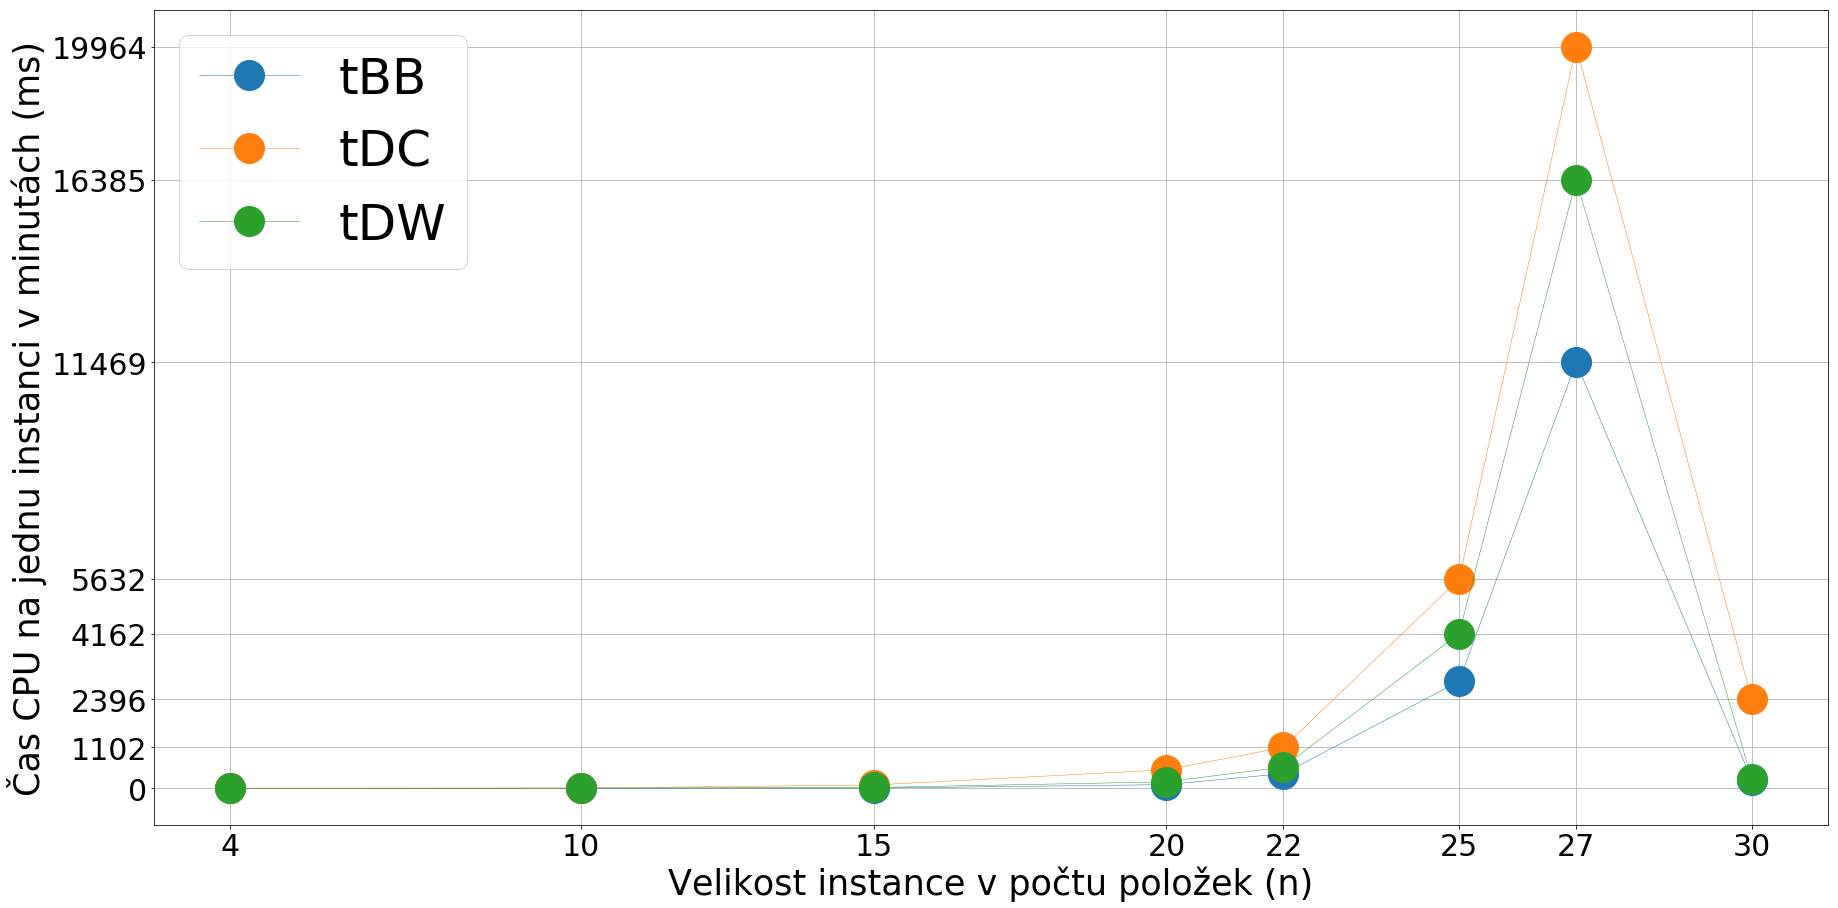

In [5]:
do_plot(30, 15, timeMean.index, timeMean[['tBB', 'tDC', 'tDW']], 
        "Velikost instance v počtu položek (n)", 
        "Čas CPU na jednu instanci v minutách (ms)", "test.pdf")
#do_plot(30, 15, df.index, df[time], "Velikost instance v počtu položek (n)", 
#        "Čas CPU na jednu instanci v minutách (ms)", "test.pdf")